In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
! ls gdrive/My\ Drive/ReDI

'07-Joining DataFrames – Merge and Concat.ipynb'
 08-plotting-First_introduction_to_analytical_thinking.ipynb
'Class material'
'Copy of 07-Joining DataFrames – Merge and Concat.ipynb'
'Copy of 08-plotting-First_introduction_to_analytical_thinking.ipynb'
'Copy of Class-02_python_data_structures.ipynb'
'Copy of IntroToDataScienceSimplified.ipynb'
'Copy of Lecture 3 - Intro to Pandas (REFACTOR).ipynb'
'Copy of Stats & Aggregation.ipynb'
'Merge – Inner, Left, Right, Outer.ipynb'


In [4]:
root_path = '/content/gdrive/My Drive/final_project_redi'

In [5]:
cd '/content/gdrive/My Drive/final_project_redi'

/content/gdrive/.shortcut-targets-by-id/1Wm0NGPCFy3kBB3r_4H0nwnB1SKJGTXoo/final_project_redi


In [6]:
#! unzip train.csv.zip - wite A to unzip all 
! unzip preprocessed_ga_revenue_data.zip

Archive:  preprocessed_ga_revenue_data.zip
replace preprocessed_ga_revenue_data/train_flat_no_hits.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: preprocessed_ga_revenue_data/train_flat_no_hits.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._train_flat_no_hits.pkl  
  inflating: preprocessed_ga_revenue_data/test_flat_no_hits.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._test_flat_no_hits.pkl  
  inflating: preprocessed_ga_revenue_data/train_hits_flat.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._train_hits_flat.pkl  
  inflating: preprocessed_ga_revenue_data/test_hits_flat.pkl  
  inflating: __MACOSX/preprocessed_ga_revenue_data/._test_hits_flat.pkl  


In [7]:
cd preprocessed_ga_revenue_data

/content/gdrive/.shortcut-targets-by-id/1Wm0NGPCFy3kBB3r_4H0nwnB1SKJGTXoo/final_project_redi/preprocessed_ga_revenue_data


In [8]:
ls

'C:\\Desktop\df_train_main.csv'   test_flat_no_hits.pkl
 df1.csv                          test_hits_flat.pkl
 df_train.csv                     train_flat_no_hits.pkl
 df_train_main.csv                train_hits_flat.pkl
'E:\\df_train_main.csv'


In [9]:
df_train = pd.read_pickle('train_flat_no_hits.pkl')

In [10]:
df_train.shape

(1708337, 60)

In [11]:
# To replace _ with . betweeen names in each column
df_train.columns = df_train.columns.str.replace(".", "_")

# start

In [12]:
#Removing columns those are non usable. 60 columns decresed to 18 
df_train_new = df_train.drop(["trafficSource_keyword","totals_bounces","totals_newVisits","totals_sessionQualityDim",\
                          "trafficSource_referralPath","device_language","socialEngagementType","device_browserVersion",\
                          "device_mobileInputSelector", "device_mobileDeviceInfo", "device_mobileDeviceMarketingName","device_flashVersion",\
                          "device_screenColors","device_screenResolution","geoNetwork_cityId", "geoNetwork_latitude","geoNetwork_longitude",\
                          "geoNetwork_networkLocation","trafficSource_adwordsClickInfo_criteriaParameters","geoNetwork_continent",\
                          "geoNetwork_subContinent", "device_browserSize","device_operatingSystemVersion", "device_mobileDeviceBranding",\
                          "device_mobileDeviceModel","trafficSource_isTrueDirect","trafficSource_adContent",\
                          "trafficSource_adwordsClickInfo_page","device_mobileDeviceModel","trafficSource_adwordsClickInfo_slot",\
                          "trafficSource_adwordsClickInfo_gclId","geoNetwork_country","trafficSource_adwordsClickInfo_adNetworkType",\
                          "trafficSource_adwordsClickInfo_isVideoAd","trafficSource_campaignCode", "date","customDimension_index",\
                          "customDimension_value","geoNetwork_city","geoNetwork_metro","geoNetwork_networkDomain","trafficSource_campaign",\
                          "trafficSource_medium"], axis=1)
print(df_train.shape)
print(df_train_new.shape)


(1708337, 60)
(1708337, 18)


# Test

In [13]:
plt.figure(figsize=(20,5))
#sns.countplot(x= "totals_visits", data= df_train_new)

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

# customer defining

In [14]:
# finding the customers:
df_train_new["totals_transactions"] = df_train_new["totals_transactions"].apply(float)
df_train_new["totals_transactionRevenue"] = df_train_new["totals_transactionRevenue"].apply(float)
df_train_new["totals_totalTransactionRevenue"] = df_train_new["totals_totalTransactionRevenue"].apply(float)
df_customer = df_train_new[(df_train_new["totals_transactions"] > 0) | (df_train_new["totals_transactionRevenue"] > 0)\
                           | (df_train_new["totals_totalTransactionRevenue"] > 0)]
df_customer.shape

(18559, 18)

In [15]:
18559 / 1708337

0.010863781560663968

In [16]:
df_customer.totals_transactionRevenue = df_customer.totals_transactionRevenue / 1000000
df_customer.totals_totalTransactionRevenue = df_customer.totals_totalTransactionRevenue / 1000000

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# How to fill with propotion


In [17]:
df_customer.head(2)

,channelGrouping,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_source
433,Organic Search,9549826748224805897,1508200705,4,1508200705,Chrome,Macintosh,False,desktop,New York,1,9,9,261,1.0,15.19,17.19,google
550,Referral,3700714855829972615,1508192636,11,1508192636,Chrome,Windows,False,desktop,California,1,15,12,285,1.0,8.00,13.00,(direct)


reqrouping on columns

In [18]:
#To add some channels that haver less popularity in one group
def regrouping_channels(channel):
  if channel in ["Social","Affiliates",'Display','Paid Search',"(Other)"]:
    channel = "Other_chan"
  return channel

In [19]:
df_customer.channelGrouping = df_customer.channelGrouping.apply(regrouping_channels)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df_customer.channelGrouping.unique()

array(['Organic Search', 'Referral', 'Direct', 'Other_chan'], dtype=object)

In [21]:
df_customer.device_browser.unique()

array(['Chrome', 'Safari', 'Internet Explorer', 'Firefox',
       'Safari (in-app)', 'Edge', 'Samsung Internet', 'Android Webview',
       'Opera', 'Amazon Silk', 'YaBrowser'], dtype=object)

In [23]:
def regrouping_browsers (browser):
  if browser in ['Safari (in-app)','Edge', 'Samsung Internet', 'Android Webview', 'Opera', 'Amazon Silk', 'YaBrowser']:
    browser = "Other"
  return browser

In [24]:
df_customer.device_browser = df_customer.device_browser.apply(regrouping_browsers)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


we need to do the same for other columns with strings

In [28]:
def city_rep(city):
  if city in ["not available in demo dataset", "(not set)" ]:
    arb_city = ['California', 'New York', 'Illinois', 'Washington',"Texas" ,]
    city = np.random.choice(arb_city, 1, p=[0.5, 0.25, 0.15, 0.05 , 0.05 ])
    city = str(city).lstrip('[').rstrip(']')
    city = str(city).lstrip("'").rstrip("'")
  return city

In [29]:
df_customer.geoNetwork_region = df_customer.geoNetwork_region.apply(city_rep)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df_customer.head(2)

,channelGrouping,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_source
433,Organic Search,9549826748224805897,1508200705,4,1508200705,Chrome,Macintosh,False,desktop,New York,1,9,9,261,1.0,15.19,17.19,google
550,Referral,3700714855829972615,1508192636,11,1508192636,Chrome,Windows,False,desktop,California,1,15,12,285,1.0,8.00,13.00,(direct)


In [34]:
df_customer.device_operatingSystem.unique()

array(['Macintosh', 'Windows', 'iOS', 'Chrome OS', 'Linux', 'Android',
       'Windows Phone'], dtype=object)

In [35]:
#sns.countplot(df_customer.device_operatingSystem)

In [36]:
df_customer.groupby(['device_operatingSystem'])['fullVisitorId'].count().sort_values(ascending=False).head(9)

device_operatingSystem
Macintosh        10370
Windows           3592
Chrome OS         1703
Linux             1304
iOS                833
Android            756
Windows Phone        1
Name: fullVisitorId, dtype: int64

In [37]:
def regrouping_operation (sys):
  if sys in ["Windows Phone","Android","iOS"]:
    sys = "Other"
  return sys

In [38]:
df_customer.device_operatingSystem = df_customer.device_operatingSystem.apply(regrouping_operation)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
df_customer.groupby(['device_operatingSystem'])['fullVisitorId'].count().sort_values(ascending=False).head(9)

device_operatingSystem
Macintosh    10370
Windows       3592
Chrome OS     1703
Other         1590
Linux         1304
Name: fullVisitorId, dtype: int64

In [40]:
df_customer.groupby(['device_deviceCategory'])['fullVisitorId'].count().sort_values(ascending=False).head(9)

device_deviceCategory
desktop    16946
mobile      1368
tablet       245
Name: fullVisitorId, dtype: int64

In [42]:
def regrouping_source (sys):
  if sys not in ["(direct)","google"]:
    sys = "Other"
  return sys

In [43]:
df_customer.trafficSource_source = df_customer.trafficSource_source.apply(regrouping_source)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
df_customer.geoNetwork_region.unique

<bound method Series.unique of 433          New York
550        California
555        California
597        California
619          New York
              ...    
1707986      New York
1707989         Texas
1707998         Seoul
1707999      New York
1708001      New York
Name: geoNetwork_region, Length: 18559, dtype: object>

In [47]:
df_customer.head(5)

,channelGrouping,fullVisitorId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_region,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_source
433,Organic Search,9549826748224805897,1508200705,4,1508200705,Chrome,Macintosh,False,desktop,New York,1,9,9,261,1.0,15.19,17.19,google
550,Referral,3700714855829972615,1508192636,11,1508192636,Chrome,Windows,False,desktop,California,1,15,12,285,1.0,8.00,13.00,(direct)
555,Organic Search,1572225825161580042,1508162218,6,1508162218,Safari,Other,True,mobile,California,1,15,15,1044,1.0,57.30,65.30,google
597,Referral,7187192533100162289,1508189401,17,1508189401,Chrome,Macintosh,False,desktop,California,1,18,16,514,1.0,18.23,25.23,(direct)
619,Referral,7889233516776348524,1508190484,1,1508190484,Chrome,Macintosh,False,desktop,New York,1,21,20,487,1.0,12.31,16.31,(direct)


In [48]:
#one hot channelGrouping
rated_dummies1 = pd.get_dummies(df_customer.channelGrouping)
df1 = pd.concat([df_customer, rated_dummies1], axis=1)
df1  = df1.drop(["channelGrouping"], axis=1)
df1.head()
print(df1.shape)


(18559, 21)


In [49]:
#one hot device_browser
rated_dummies2 = pd.get_dummies(df1.device_browser)
df1 = pd.concat([df1, rated_dummies2], axis=1)
df1  = df1.drop(["device_browser"], axis=1)
df1.head()
print(df1.shape)

(18559, 25)


In [50]:
#one hot device_operatingSystem
rated_dummies3 = pd.get_dummies(df1.device_operatingSystem)
df1 = pd.concat([df1, rated_dummies3], axis=1)
df1  = df1.drop(["device_operatingSystem"], axis=1)
df1.head()
print(df1.shape)

(18559, 29)


In [51]:
#one hot device_deviceCategory
rated_dummies4 = pd.get_dummies(df1.device_deviceCategory)
df1 = pd.concat([df1, rated_dummies4], axis=1)
df1  = df1.drop(["device_deviceCategory"], axis=1)
df1.head()
print(df1.shape)

(18559, 31)


In [52]:
#city >400 col ?????

In [53]:
#one hot trafficSource_source
rated_dummies5 = pd.get_dummies(df1.trafficSource_source)
df1 = pd.concat([df1, rated_dummies5], axis=1)
df1  = df1.drop(["trafficSource_source"], axis=1)
df1.head()
print(df1.shape)

(18559, 33)


In [54]:
#nan haro hazf konim

In [55]:
df1.to_csv("df1.csv")

In [56]:
def regrouping_region (reg):
  if reg not in ["California","New York", "Illinois","Texas","Washington","Michigan","Massachusetts","Georgia","District of Columbia",\
                 "Ontario","Pennsylvania","Virginia","Colorado"]:
    reg = "Other"
  return reg

In [57]:
df1.geoNetwork_region = df1.geoNetwork_region.apply(regrouping_region)

In [58]:
df1.groupby(['geoNetwork_region'])['fullVisitorId'].count().sort_values(ascending=False).head(15)

geoNetwork_region
California              9272
New York                4188
Illinois                1751
Texas                    885
Washington               858
Other                    457
Michigan                 276
Massachusetts            221
Georgia                  160
District of Columbia     143
Ontario                   96
Pennsylvania              95
Virginia                  88
Colorado                  69
Name: fullVisitorId, dtype: int64

In [59]:
#one hot regions
rated_dummies6 = pd.get_dummies(df1.geoNetwork_region)
df1 = pd.concat([df1, rated_dummies6], axis=1)
df1  = df1.drop(["geoNetwork_region"], axis=1)
df1.head()
print(df1.shape)

(18559, 46)


In [60]:
df1.totals_transactionRevenue.fillna(0)

433         15.19
550          8.00
555         57.30
597         18.23
619         12.31
            ...  
1707986    335.26
1707989    599.95
1707998     30.75
1707999     69.39
1708001     74.99
Name: totals_transactionRevenue, Length: 18559, dtype: float64

In [61]:
def delet_nan(item):
  if (item >= 0) or (item < 0 ):
    item = item
  else:
    item = 0
  return item

In [62]:
df1.totals_transactionRevenue = df1.totals_transactionRevenue.apply(delet_nan)

In [63]:
df1.totals_totalTransactionRevenue = df1.totals_totalTransactionRevenue.apply(delet_nan)

In [64]:
df1["totals_timeOnSite"] = df1["totals_timeOnSite"].apply(float)

In [65]:
df1.totals_timeOnSite = df1.totals_timeOnSite.apply(delet_nan)

In [69]:
df1.isna().sum()

fullVisitorId                     0
visitId                           0
visitNumber                       0
visitStartTime                    0
device_isMobile                   0
totals_visits                     0
totals_hits                       0
totals_pageviews                  0
totals_timeOnSite                 0
totals_transactions               0
totals_transactionRevenue         0
totals_totalTransactionRevenue    0
Direct                            0
Organic Search                    0
Other_chan                        0
Referral                          0
Chrome                            0
Firefox                           0
Internet Explorer                 0
Other                             0
Safari                            0
Chrome OS                         0
Linux                             0
Macintosh                         0
Other                             0
Windows                           0
desktop                           0
mobile                      

In [70]:
# Final dataframe before Machine Learning
df_customer_train = df1

MACHINE LEARNING PART

In [71]:
import sklearn.model_selection as model_selection
import sklearn.linear_model as model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
df1.head(2)

,fullVisitorId,visitId,visitNumber,visitStartTime,device_isMobile,totals_visits,totals_hits,totals_pageviews,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,Direct,Organic Search,Other_chan,Referral,Chrome,Firefox,Internet Explorer,Other,Safari,Chrome OS,Linux,Macintosh,Other,Windows,desktop,mobile,tablet,(direct),Other,google,California,Colorado,District of Columbia,Georgia,Illinois,Massachusetts,Michigan,New York,Ontario,Other,Pennsylvania,Texas,Virginia,Washington
433,9549826748224805897,1508200705,4,1508200705,False,1,9,9,261.0,1.0,15.19,17.19,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
550,3700714855829972615,1508192636,11,1508192636,False,1,15,12,285.0,1.0,8.00,13.00,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:

df_customer_train.columns.to_list()

['fullVisitorId',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device_isMobile',
 'totals_visits',
 'totals_hits',
 'totals_pageviews',
 'totals_timeOnSite',
 'totals_transactions',
 'totals_transactionRevenue',
 'totals_totalTransactionRevenue',
 'Direct',
 'Organic Search',
 'Other_chan',
 'Referral',
 'Chrome',
 'Firefox',
 'Internet Explorer',
 'Other',
 'Safari',
 'Chrome OS',
 'Linux',
 'Macintosh',
 'Other',
 'Windows',
 'desktop',
 'mobile',
 'tablet',
 '(direct)',
 'Other',
 'google',
 'California',
 'Colorado',
 'District of Columbia',
 'Georgia',
 'Illinois',
 'Massachusetts',
 'Michigan',
 'New York',
 'Ontario',
 'Other',
 'Pennsylvania',
 'Texas',
 'Virginia',
 'Washington']

In [75]:
Y = df_customer_train["totals_totalTransactionRevenue"].values
X = df_customer_train[["visitNumber","device_isMobile","totals_visits","totals_hits","totals_pageviews","totals_timeOnSite","totals_transactions",\
              "totals_transactionRevenue","Direct", 'Organic Search',  'Referral',  'Chrome',  'Firefox',  'Internet Explorer',\
                 'Safari',  'Chrome OS',  'Linux',  'Macintosh',  'Windows',  'desktop',  'mobile',  'tablet',  '(direct)', \
               'google',  'California',  'Colorado',  'District of Columbia','Georgia',  'Illinois',  'Massachusetts',  'Michigan',  'New York',  'Ontario',\
                'Pennsylvania',  'Texas',  'Virginia',  'Washington']].values

In [76]:
def split_data(X,Y):
    """Split data and return train, test and indices for further analysis"""
    X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
    return X_train, X_test, Y_train, Y_test

In [77]:
X_train, X_test, Y_train, Y_test = split_data(X, Y)

In [78]:
# Training
rf = RandomForestRegressor(n_estimators=50, )
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
# Prediction 
Y_pred = rf.predict(X_test) # make sure that ypu test with the test set

In [80]:
# score function returns the mean accuracy on the given test data and labels
rf.score(X_test, Y_test)

0.7245492838491905

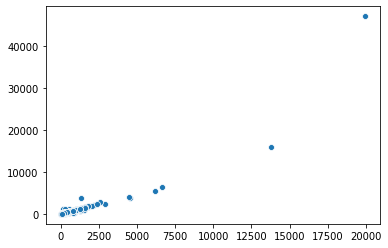

In [81]:
sns.scatterplot(Y_pred, Y_test)